$$\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}$$

# Reflection and Transmission

We understand that the resistance of a medium, the acoustic impedance, affects the wave propagation. Now, we explore what happens if a planar wave encounters a medium with a different characteristic impedance. Similar to electromagnetic waves some of the pressure wave will be reflected and some transmitted; to quantify this we introduce a pressure transmission, $T$, and reflection coefficient, $R$:

\begin{equation}
T=\frac{P_t}{P_i}\quad \quad
R=\frac{P_r}{P_i}\label{eq:5.1}\tag{5.1}
\end{equation}

where $P_i$ is the amplitude of the incoming wave, $P_t$, the amplitude of the transmitted, and $P_r$ the amplitude of the reflected wave. Note that these coefficient are in general complex. The intensity for planar progressive waves is always real, therefore we can write the intensity transmission and reflection coefficient as

\begin{equation}
T_I=\frac{I_t}{I_i}=\frac{r_1}{r_2}\left|T\right|^2\\
R_I=\frac{I_r}{I_i}=\left|R\right|^2\label{eq:5.2}\tag{5.2}
\end{equation}

[Fig. 5.1](#fig5.1) depicts the geometry for a normal incidence beam. Consider that beams of finite power have a limited diameter. If the beam is not incident under an angle we need to take into account the beam diameter of the incoming and that of the transmitted beam. Thus the transmission coefficient for the power $T_\Pi$ is

\begin{equation}
T_\Pi=\frac{A_i}{A_t}T_I=\frac{A_i}{A_t}\frac{r_1}{r_2} \left|T\right|^2\quad .\label{eq:5.3}\tag{5.3}
\end{equation}

We show later that the beam diameter of the reflected beam does not change even under an inclinded reflection, thus the reflection ocefficient for the power is

\begin{equation}
R_\Pi=R_I=\left|R\right|^2\quad .\label{eq:5.4}\tag{5.4}
\end{equation}

Conservation of Energy demands

\begin{equation}
R_\Pi+T_\Pi=1\label{eq:5.5}\tag{5.5}
\end{equation}

<img src="images/Lecture 5 Fig1.png" width=350> <p>
<center> <a id='fig5.1'>Figure 5.1: </a>Reflection and transmission of a plane wave under normal incidence of a planar boundary between two fluids of different characteristic impedances</center>

For the normal incidence we have to account for three surface normal waves, see [Fig. 5.1](#fig5.1). These are

\begin{equation}
p_i= P_i e^{i\omega t-k_1 x}\label{eq:5.6}\tag{5.6}
\end{equation}
\begin{equation}
p_r= P_r e^{i\omega t+k_1 x}\label{eq:5.7}\tag{5.7}
\end{equation}
\begin{equation}
p_t= P_t e^{i\omega t-k_2 x}\label{eq:5.8}\tag{5.8}
\end{equation}

for the incoming, the reflected and the transmitted wave, respectively. Both the incoming and the reflected wave have the same wave number $k_1=\omega/c_1$, while the transmitted wave has a wave number $k_2=\omega/c_2$. $c_1$ and $c_2$ are the speed of sound in medium 1 and 2. The frequency does not change upon reflection.

To formulate the boundary conditions we assume that the boundary is rigid and does not create a force from within. A rigid boundary does not move, demanding that the particle velocity of the interface is 0. 
The requirement that the boundary creates no force we can obtain a continuity of the force on the left and right side of the boundary. Thus both the pressure and the normal particle velocity on both sides of the boundary are equal:

\begin{equation}
p_i+p_r=p_t\label{eq:5.9}\tag{5.9}
\end{equation}

\begin{equation}
u_i+u_r=u_t\label{eq:5.10}\tag{5.10}\quad .
\end{equation}

at $x=0$. We can devide Eq. (5.9) by Eq. (5.10), thus

\begin{equation}
\frac{p_i+p_r}{u_i+u_r}=\frac{p_t}{u_t}\label{eq:5.11}\tag{5.11}\quad.
\end{equation}

The ratio on the right hand side of Eq. (5.11) is the specific acoustic impedance, $r=\pm p/u$, while on the left hand side we can replace the particle velocity with the pressure and obtain

\begin{equation}
r_1\frac{p_i+p_r}{p_i-p_r}=r_2\label{eq:5.12}\tag{5.12}\quad.
\end{equation}

Equation (5.13) can be rearranged to obtain the reflection coefficient, $R=p_r/p_i$ for normal incidence. 

\begin{equation}
R=\frac{r_2-r_1}{r_2+r_1}=\frac{\frac{r_2}{r_1}-1}{\frac{r_2}{r_1}+1}\label{eq:5.13}\tag{5.13}
\end{equation}
We can obtain the Transmission coefficient from understanding that Eq. (5.9) devided $p_i$ gives 

\begin{equation}
1+R=T\label{eq:5.14}\tag{5.14}\quad,
\end{equation}

and therefore the transmission coefficient

\begin{equation}
T=\frac{2 r_2}{r_2+r_1}=\frac{2\frac{r_2}{r_1}}{\frac{r_2}{r_1}+1}\label{eq:5.15}\tag{5.15}\quad .
\end{equation}


In [4]:
%load_ext Cython

In [2]:
def calcu(un, unn, cc, rho, cconst):
    return 2.*un[1:-1,1:-1]-unn[1:-1,1:-1]+cconst*(cc[1:-1,1:-1]*\
        (un[:-2,1:-1]+un[2:,1:-1]+un[1:-1,:-2]+un[1:-1,2:]-4.*un[1:-1,1:-1])-\
        .25*rho[1:-1,1:-1]*((rho[2:,1:-1]-rho[:-2,1:-1])*(un[2:,1:-1]-un[:-2,1:-1])+\
        (rho[1:-1,2:]-rho[1:-1,:-2])*(un[1:-1,2:]-un[1:-1,:-2])))

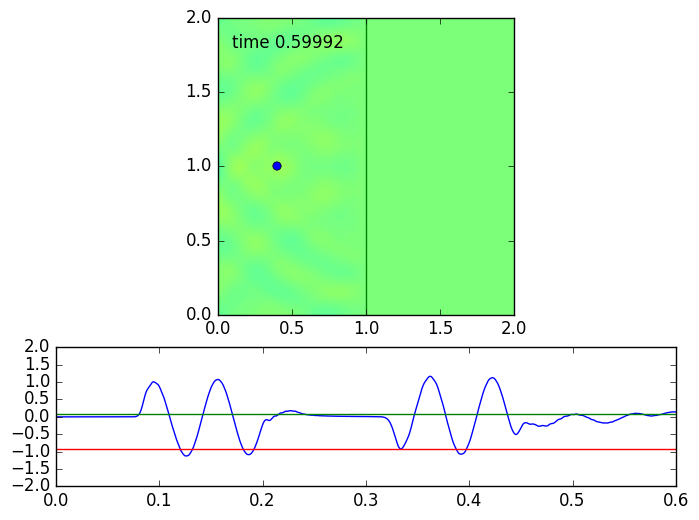

In [3]:
%matplotlib notebook
import math as m
import numpy #array operations
import matplotlib.pyplot as plt #plotting
from matplotlib.collections import LineCollection
import matplotlib.colors as colors
from ipywidgets import widgets #for the widgets
from IPython import display #for continous display
#from PIL import Image #to export images

nimg=0

def savemyimage(visual):
    global nimg
    visual = (visual +2.)/4.
    #result = Image.fromarray((visual * 255).astype(numpy.uint8))
    #result.save('out{:03d}.bmp'.format(nimg))
    nimg=nimg+1

def plotwave(u,time,px,py,pp,pt):
    plt.figure(1)
    plt.clf()
    #plot the pressue field
    plt.subplot2grid((4,4),(0,1), colspan = 2, rowspan = 2)
    plt.imshow(u, origin='upper', extent=[0., 2., 0., 2.], vmax=2, vmin=-2) #plot the wave field
    plt.text(0.1,1.8,"time {0:.5f}".format(time)) #annotate the time
    plt.plot(w_probex.value,1.,'o') #position of probe
    plt.plot([w_iposition.value,w_iposition.value],[0.,2.])
    plt.gca().set_xlim([0.,2.])
    plt.gca().set_ylim([0.,2.])
    plt.subplot2grid((4,4),(2,0), colspan = 4, rowspan = 1)
    plt.plot(pt,pp) #plot the pressure at the probe
    r1=w_irho1.value*w_ic1.value
    r2=w_irho2.value*w_ic2.value
    T=2.*r2/(r1+r2)
    R=(r2-r1)/(r2+r1)
    plt.plot([0.,pt[-1]],[T,T])
    plt.plot([0.,pt[-1]],[R,R])
    plt.gca().set_ylim([-2,2])
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
def solvewave(b):
    tabs.visible=False #make space for simulation
    #computational domain
    nx = ny = 381
    size=2. #size of the domain
    #parameters of the wave
    c = 5. #speed of sound of homogeneous me`dium 
    l=w_wavelength.value #wavelength
    nu=c/l #frequency
    omega=nu*2.*m.pi #angular frequency
    duration=w_sourceduration.value/nu #duration of source
    
    #position of source
    emissionlength=(w_sizeemit.value/100.)*nx
    startx=int(nx/2-emissionlength/2)
    endx=int(nx/2+emissionlength/2)

    #further variables
    dx = size/(nx-1)
    CFL=w_simcfl.value#CFL number < 1/sqrt(2)
    dt = CFL*dx/c 
    nt=int(w_simduration.value/dt) #number of time steps

    sourcepos=0

    #measuring the pressure at a position
    pt=numpy.arange(nt+1)*dt
    pp=numpy.zeros(nt+1)
    px=int(w_probex.value*(nx-1)/2.)
    py=int(ny/2)
    
    #every xx times over the total nt timesteps an output should be generated 
    output=map(int,list(numpy.linspace(1,nt,int(nt*float(w_simoutput.value/100.)))))

    u  = numpy.zeros((nx,ny)) #pressure at t
    un = numpy.zeros((nx,ny)) #pressure at t-dt
    unn= numpy.zeros((nx,ny)) #pressure at t-2*dt

    #inhomogeneous speed of sound c**2 !
    cc = numpy.ones((nx,ny))*(w_ic1.value**2.)
    #inhomogeneous density
    rho = numpy.ones((nx,ny))*w_irho1.value  

    #build the inhomgeneous medium
    xx,yy=numpy.meshgrid(numpy.linspace(0,2.,nx),numpy.linspace(0,2.,nx))
    a=numpy.where(xx>w_iposition.value)
    cc[a]=w_ic2.value**2.
    rho[a]=w_irho2.value    
    
    plt.figure(1, figsize=(8, 8), dpi=300)

    for n in range(nt+1): ##loop across number of time steps

        #here we compute the wave propagation in an inhomogeneous media 
        #using Cython (to speed up things)
        u[1:-1,1:-1]=calcu(un,unn,cc,rho,dt*dt/dx/dx)

        #Impose the boundary conditions                 
        if w_nbc.value=='Open':
            u[0,:] = -dx/dt/(cc[0,:]**.5)*(u[1,:]-un[1,:])+u[1,:]
        else:
            u[0,:] = u[1,:]
        if w_sbc.value=='Open':
            u[-1,:] = -dx/dt/(cc[-1,:]**.5)*(u[-2,:]-un[-2,:])+u[-2,:]
        else:
            u[-1,:] = u[-2,:]
        if w_wbc.value=='Open':
            u[:,0] = -dx/dt/(cc[:,0]**.5)*(u[:,1]-un[:,1])+u[:,1]
        else:
            u[:,0] = u[:,1]
        if w_ebc.value=='Open':
            u[:,-1] = -dx/dt/(cc[:,-1]**.5)*(u[:,-2]-un[:,-2])+u[:,-2]
        else:
            u[:,-1] = u[:,-2]
        
        #pressure source
        if n*dt<(duration+10*dt):
            #generate a source that goes to zero after duration 
            usource=numpy.sin(omega*(n*dt))*(n*dt<duration)
            #vertical source
            u[startx:endx,sourcepos]=usource
        #save pressure
        pp[n]=u[py,px]
        #save values for the time derivative 
        unn=un.copy() #n-1 time steop
        un=u.copy()   #n time step
        
        if (n in output):
            plotwave(u,n*dt,px,py,pp,pt)
            if (w_saveplots.value):
                savemyimage(u)
            
    #and plot the last figure    
    plotwave(u,n*dt,px,py,pp,pt)
    tabs.visible=True #open menue
    
#setup the graphical interface 
w_wavelength=widgets.FloatSlider(description="Wavelength",value=.3,min=0.1,max=1)
w_sizeemit=widgets.FloatSlider(description="Emitter Size in (%)",\
                               value=100,min=1,max=100)
w_sourceduration=widgets.FloatSlider(description="Emission Duration in Periods",\
                                     value=1.,min=0.5,max=10)
w_simcfl=widgets.FloatSlider(description="CFL Number",value=.5*1./m.sqrt(2.),\
                             min=0.01,max=1./m.sqrt(2.))
w_simduration=widgets.FloatSlider(description="Simulation Duration",\
                                  value=.6,min=0.1,max=10)
w_simoutput=widgets.FloatSlider(description="Output % of timesteps",\
                                value=1.5,min=.1,max=10)
w_saveplots=widgets.Checkbox(description="Save Images",value=False)
w_sposition=widgets.RadioButtons(description="Source Position",\
                                 options=["Top", "Center", "Bottom"],value="Top",margin=10)
w_nbc=widgets.RadioButtons(description="North B.C.",\
                           options=["Reflective", "Open"],value="Reflective",margin=10)
w_sbc=widgets.RadioButtons(description="South B.C.",\
                           options=["Reflective", "Open"],value="Reflective",margin=10)
w_wbc=widgets.RadioButtons(description="West B.C.",\
                           options=["Reflective", "Open"],value="Open",margin=10)
w_ebc=widgets.RadioButtons(description="East B.C.",\
                           options=["Reflective", "Open"],value="Open",margin=10)
w_iposition=widgets.FloatSlider(description="Boundary position",value=1.,min=0.,max=2.)
w_ic1=widgets.FloatSlider(description="Speed of Sound Left",value=5.,min=1.,max=5.)
w_irho1=widgets.FloatSlider(description="Density left",value=5.,min=1.,max=5.)
w_ic2=widgets.FloatSlider(description="Speed of Sound right",value=3.,min=1.,max=5.)
w_irho2=widgets.FloatSlider(description="Density right",value=3.,min=1.,max=5.)
w_probex=widgets.FloatSlider(description="Probe Position",value=2.,min=0.,max=2.)
page1=widgets.VBox([w_wavelength,w_sizeemit,w_sourceduration])
page2=widgets.Box([w_simcfl,w_simduration,w_simoutput])
page3=widgets.Box([w_saveplots,w_probex])
page4=widgets.HBox([w_nbc,w_sbc,w_wbc,w_ebc])
page5=widgets.VBox([w_iposition,w_ic1,w_irho1,w_ic2,w_irho2])
tabs = widgets.Tab(children=[page1, page2, page3, page4, page5])
tabs.set_title(0, 'Source')
tabs.set_title(1, 'Simulation')
tabs.set_title(2, 'Record')
tabs.set_title(3, 'Boundary Conditions')
tabs.set_title(4, 'Boundary')
w_start=widgets.Button(description="Start Simulation",margin=10)
w_start.on_click(solvewave)
display.display(tabs)
display.display(w_start)